# Import Libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline

In [4]:
#Define path
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '
path

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '

In [5]:
citidf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikeclean.csv'), index_col = False)

# Cleanup

In [6]:
citidf.head()

,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [7]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   weekday                  42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_time               42993 non-null  object 
 4   start_station_id         42993 non-null  int64  
 5   start_station_name       42993 non-null  object 
 6   start_station_latitude   42993 non-null  float64
 7   start_station_longitude  42993 non-null  float64
 8   end_time                 42993 non-null  object 
 9   end_station_id           42993 non-null  int64  
 10  end_station_name         42993 non-null  object 
 11  end_station_latitude     42993 non-null  float64
 12  end_station_longitude    42993 non-null  float64
 13  trip_duration            42993 non-null  int64  
 14  subscriber            

In [8]:
#Dropping unnamed column
citidf = citidf.drop(columns = ['Unnamed: 0'])

In [9]:
#Changing 'end_time' data type date time
citidf['end_time']=pd.to_datetime(citidf['end_time'],infer_datetime_format=True) 


In [10]:
citidf.dtypes

weekday                            object
start_hour                          int64
start_time                         object
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_time                   datetime64[ns]
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
trip_duration                       int64
subscriber                         object
birth_year                        float64
gender                             object
dtype: object

# Exploring Relationships

In [11]:
# Create a correlation matrix using pandas

citidf.corr()

/var/folders/kp/9p8z9q3x6113kvlh8pwcxm1r0000gn/T/ipykernel_13330/980298154.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  citidf.corr()


,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
start_hour,1.000000,-0.003737,-0.003228,-0.045644,0.004752,-0.037997,0.010231,0.048753,0.064049
start_station_id,-0.003737,1.000000,0.106780,0.086098,0.043066,0.057260,0.023396,0.046764,-0.004759
start_station_latitude,-0.003228,0.106780,1.000000,0.203817,0.053565,0.579007,0.067596,-0.016408,-0.046369
start_station_longitude,-0.045644,0.086098,0.203817,1.000000,0.022999,0.082088,0.403150,0.001572,0.028715
end_station_id,0.004752,0.043066,0.053565,0.022999,1.000000,0.104482,0.090608,0.036858,-0.004261
end_station_latitude,-0.037997,0.057260,0.579007,0.082088,0.104482,1.000000,0.189827,-0.046746,-0.042970
end_station_longitude,0.010231,0.023396,0.067596,0.403150,0.090608,0.189827,1.000000,-0.000024,0.039176
trip_duration,0.048753,0.046764,-0.016408,0.001572,0.036858,-0.046746,-0.000024,1.000000,-0.046076
birth_year,0.064049,-0.004759,-0.046369,0.028715,-0.004261,-0.042970,0.039176,-0.046076,1.000000


In [12]:
citidf.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [13]:
#creating a subset
citidf_sub = citidf[['start_hour', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude', 'trip_duration', 'birth_year' ]]

In [14]:
#current directory
cwd = os.getcwd()
cwd

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6'

Text(0.5, 1.0, 'Correlation Matrix')

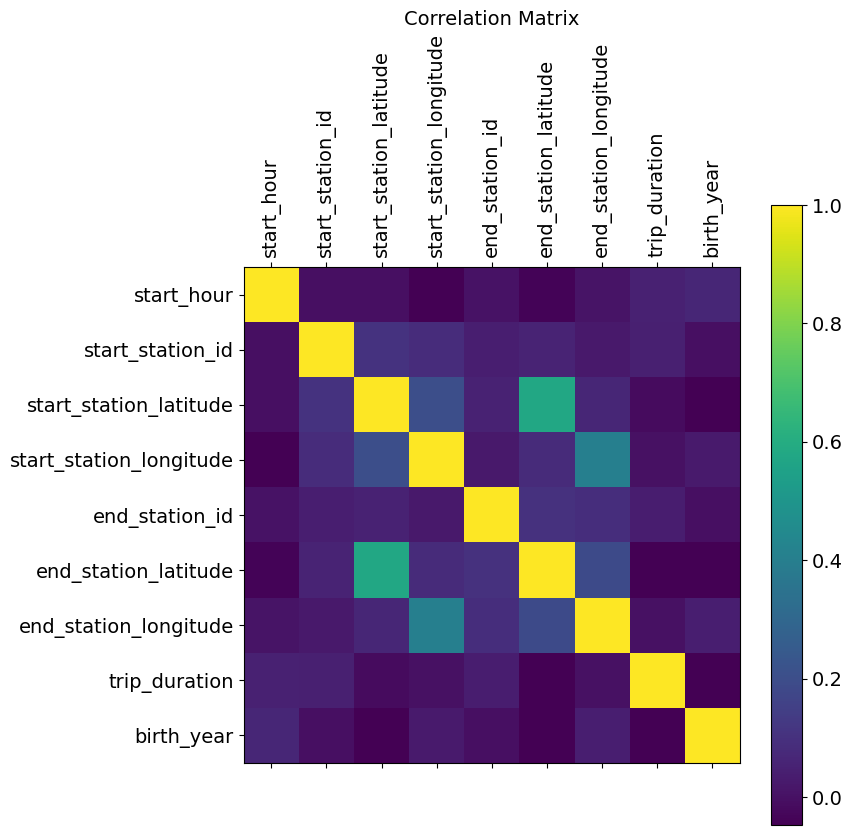

In [15]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(citidf_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(citidf_sub.shape[1]), citidf_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(citidf_sub.shape[1]), citidf_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Correlation heatmap

In [16]:
citidf.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

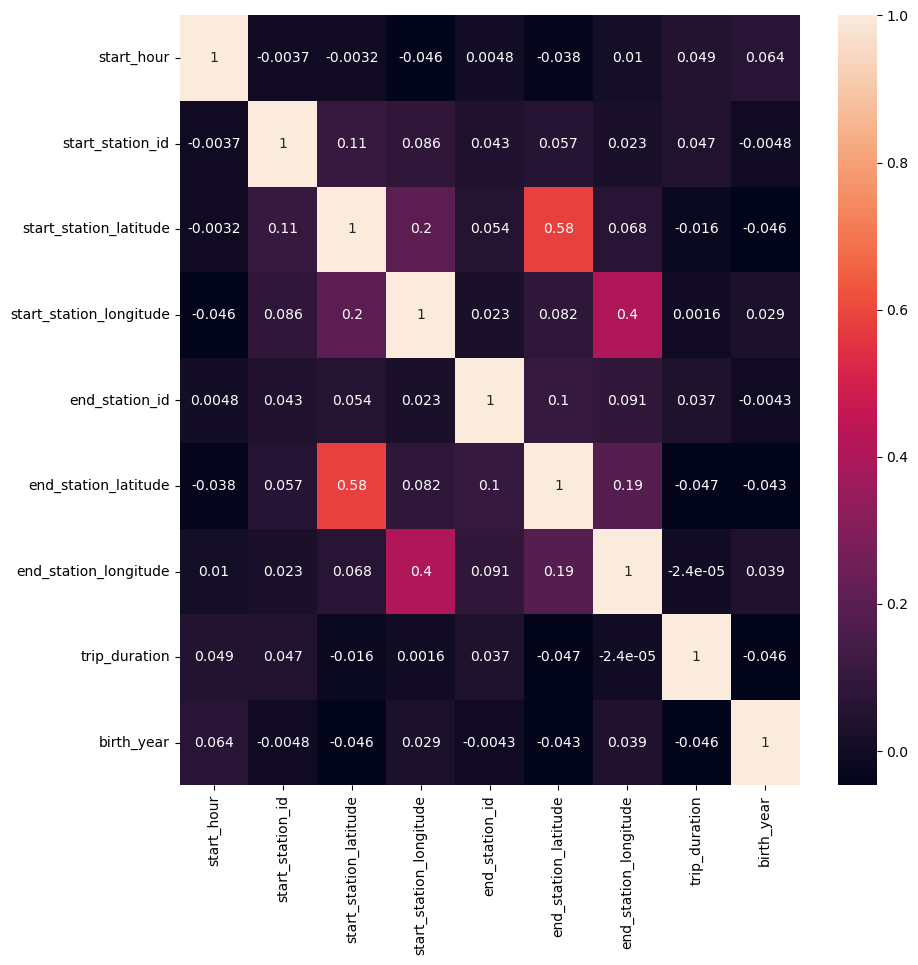

In [17]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(citidf_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

### The heatmap above tells us that start_hour has the strongest correlation, next would be start_station_latitude and end_station_latitude and the third would be start_station_longitude and end_station_longitude.

# Scatterplots

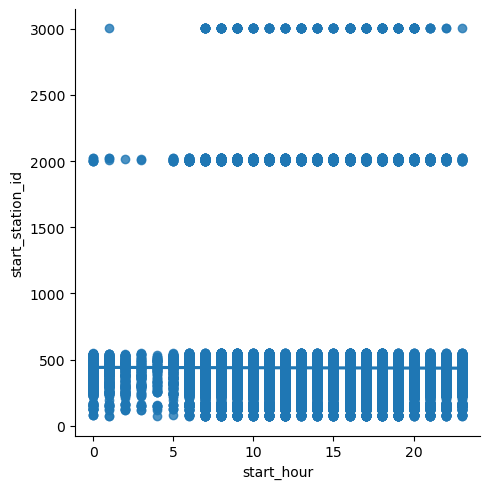

In [18]:
# Create a scatterplot for the columns 'start_hour' and 'start_station_id' in seaborn

sns.lmplot(x = 'start_hour', y = 'start_station_id', data = citidf)

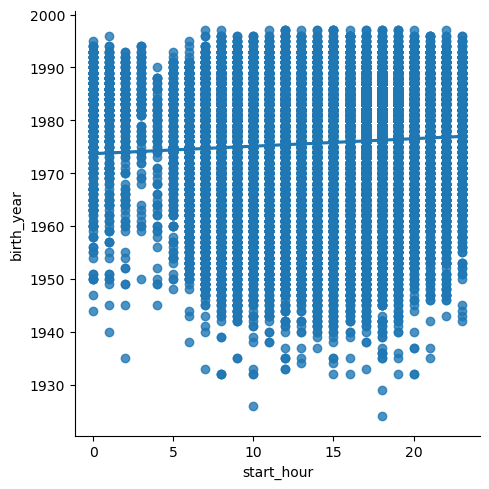

In [19]:
# Create a scatterplot for the columns 'start_hour' and 'birth_year' in seaborn

sns.lmplot(x = 'start_hour', y = 'birth_year', data = citidf)

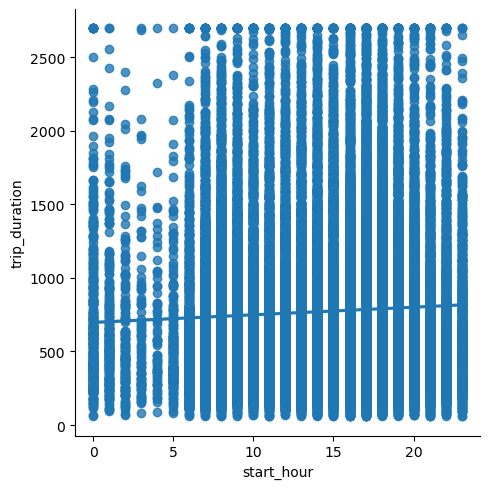

In [20]:
# Create a scatterplot for the columns 'start_hour' and 'trip_duration' in seaborn

sns.lmplot(x = 'start_hour', y = 'trip_duration', data = citidf)

# Pairplot

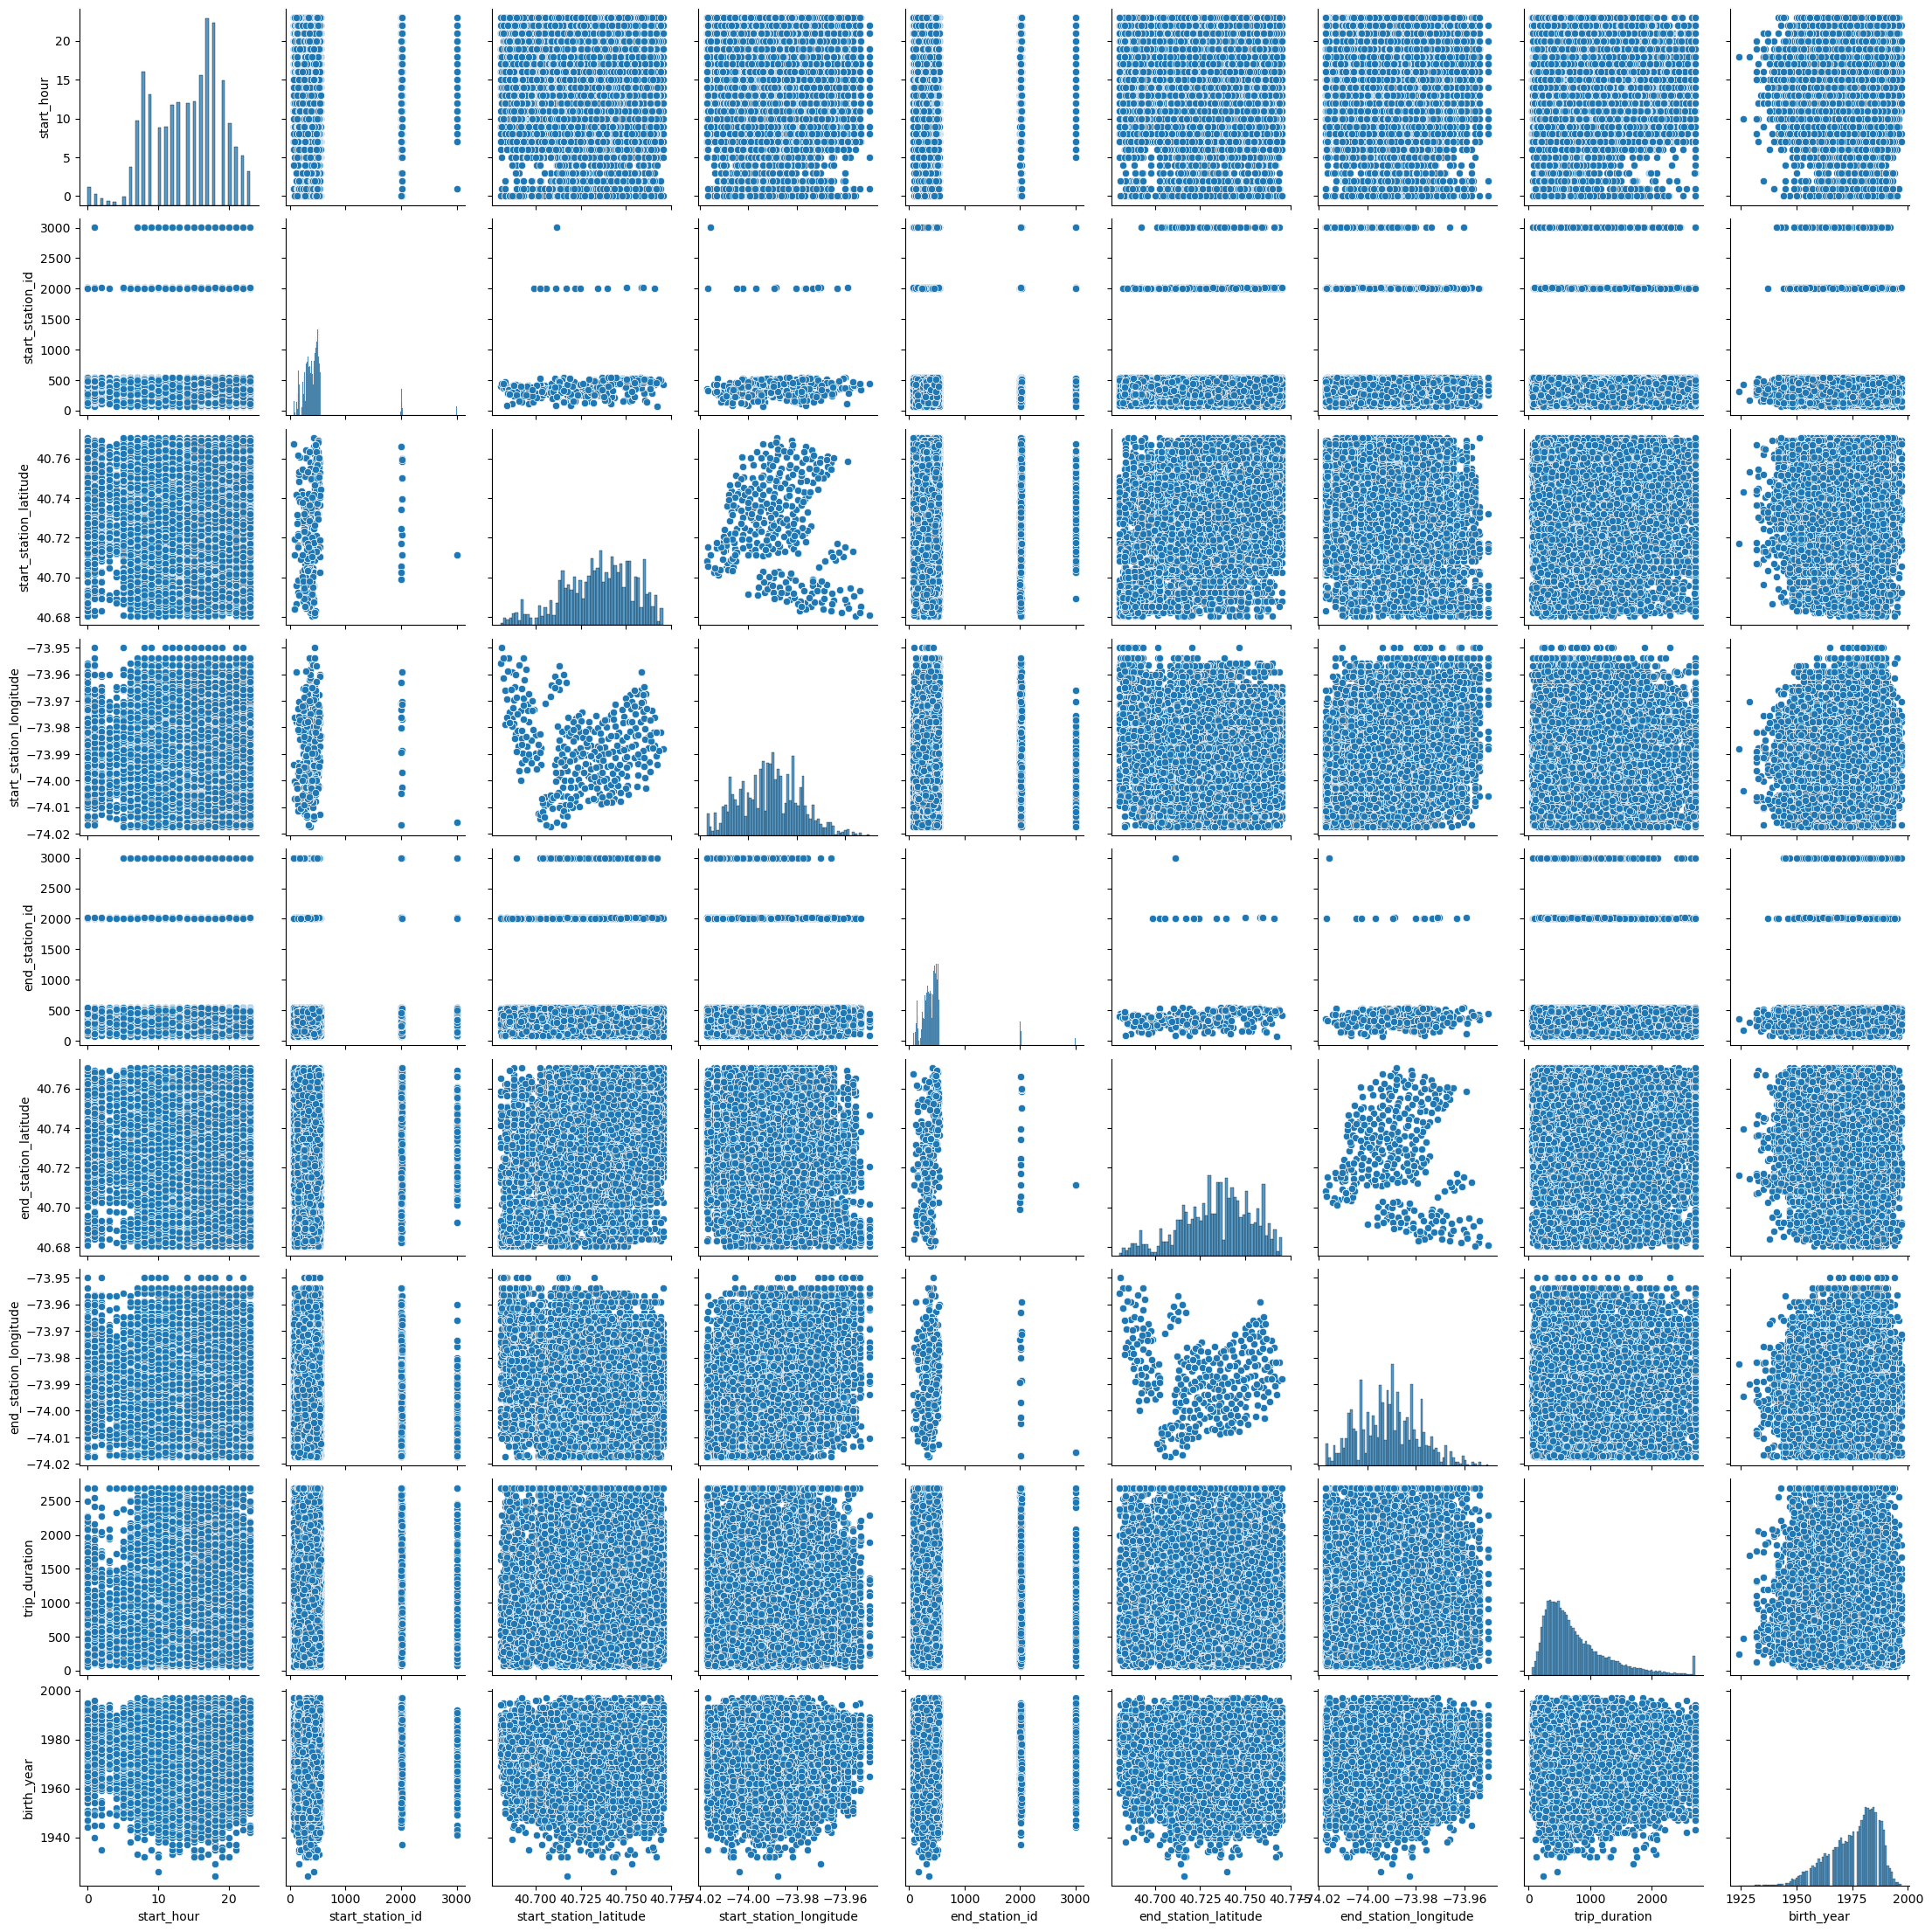

In [21]:
# Create a pair plot of entire dataset
g = sns.pairplot(citidf_sub)

# Categorical Plots

In [22]:
citidf.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

<Axes: xlabel='start_hour', ylabel='Count'>

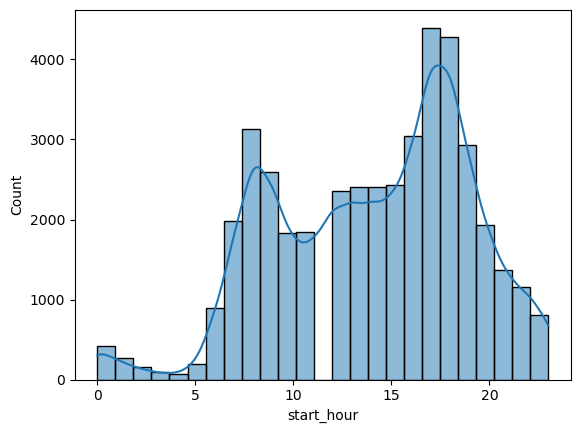

In [23]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(citidf['start_hour'], bins = 25, kde = True)

### As we can see from the figure above the busiest hour of the day is 17(or 5pm) and 18(or 6pm) and the third busiest time is in the morning at 8 am. These are around the hours people tend to start to go to work and finish working for the day so these times make sense.

In [24]:
citidf.loc[(citidf['start_hour'] >= 5) & (citidf['start_hour'] <= 11), 'Part_of_day_cate'] = 'morning'

In [25]:
citidf.loc[(citidf['start_hour'] >= 12) & (citidf['start_hour'] <= 17), 'Part_of_day_cate'] = 'afternoon'

In [26]:
citidf.loc[(citidf['start_hour'] >= 18) & (citidf['start_hour'] <= 21), 'Part_of_day_cate'] = 'evening'

In [27]:
citidf.loc[(citidf['start_hour'] >= 22) & (citidf['start_hour'] <= 4), 'Part_of_day_cate'] = 'night'

In [28]:
citidf['Part_of_day_cate'].value_counts(dropna = False)

afternoon    17042
morning      12457
evening      10513
NaN           2981
Name: Part_of_day_cate, dtype: int64

In [29]:
citidf.columns

Index(['weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'Part_of_day_cate'],
      dtype='object')

<Axes: xlabel='weekday', ylabel='Count'>

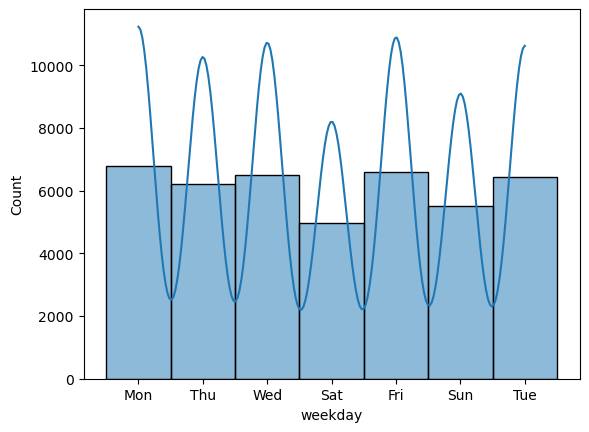

In [30]:
sns.histplot(citidf['weekday'], bins = 20, kde = True)

### As we can see from the chart above the busiest day for citi bike usage is Monday while the slowest day for citi bike usage is Saturday. I believe that because Mondays are the start of the work week it makes sense for Monday to be busy while Saturday a weekend tends to be slow.

<Axes: xlabel='birth_year', ylabel='Count'>

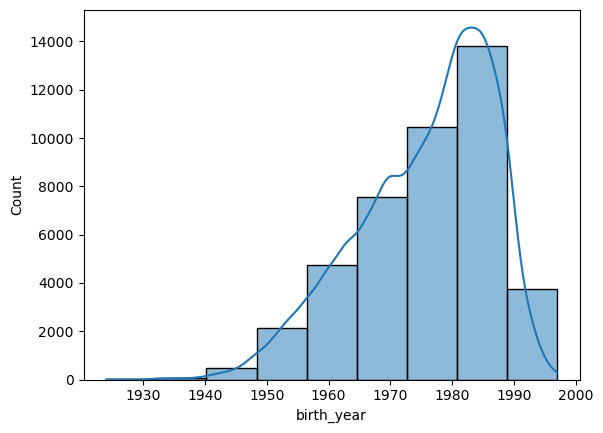

In [31]:
sns.histplot(citidf['birth_year'], bins = 9, kde = True)

### The chart above displays that the highest count of citi bike riders are born in the 80s - 90's. Young adults tend to use citi bikes the most.

<Axes: xlabel='gender', ylabel='Count'>

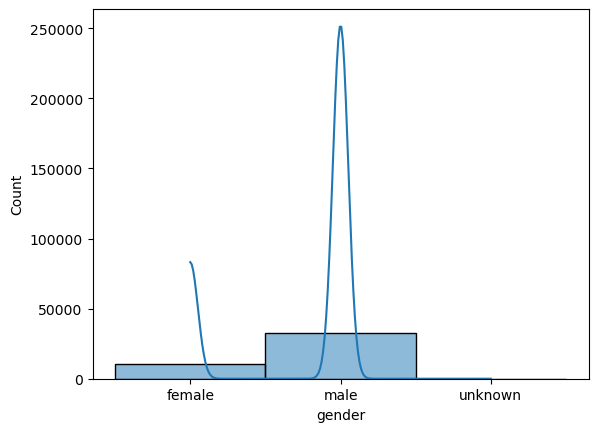

In [32]:
sns.histplot(citidf['gender'], bins = 20, kde = True)

### This chart above shows that males use citibikes a little over twice as much as females. 

<Axes: xlabel='start_station_name', ylabel='Count'>

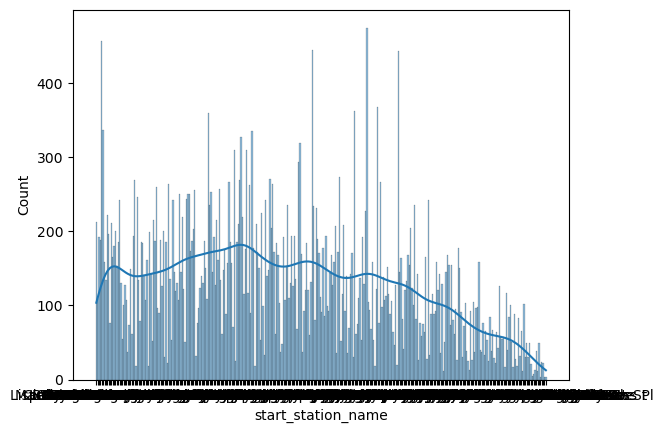

In [33]:
sns.histplot(citidf['start_station_name'], bins = 10, kde = True)

### The chart above displays the busiest citibike stations but its difficult to name since there are so many and the graph is small.

(array([0, 1, 2]),
 [Text(0, 0, 'morning'), Text(1, 0, 'afternoon'), Text(2, 0, 'evening')])

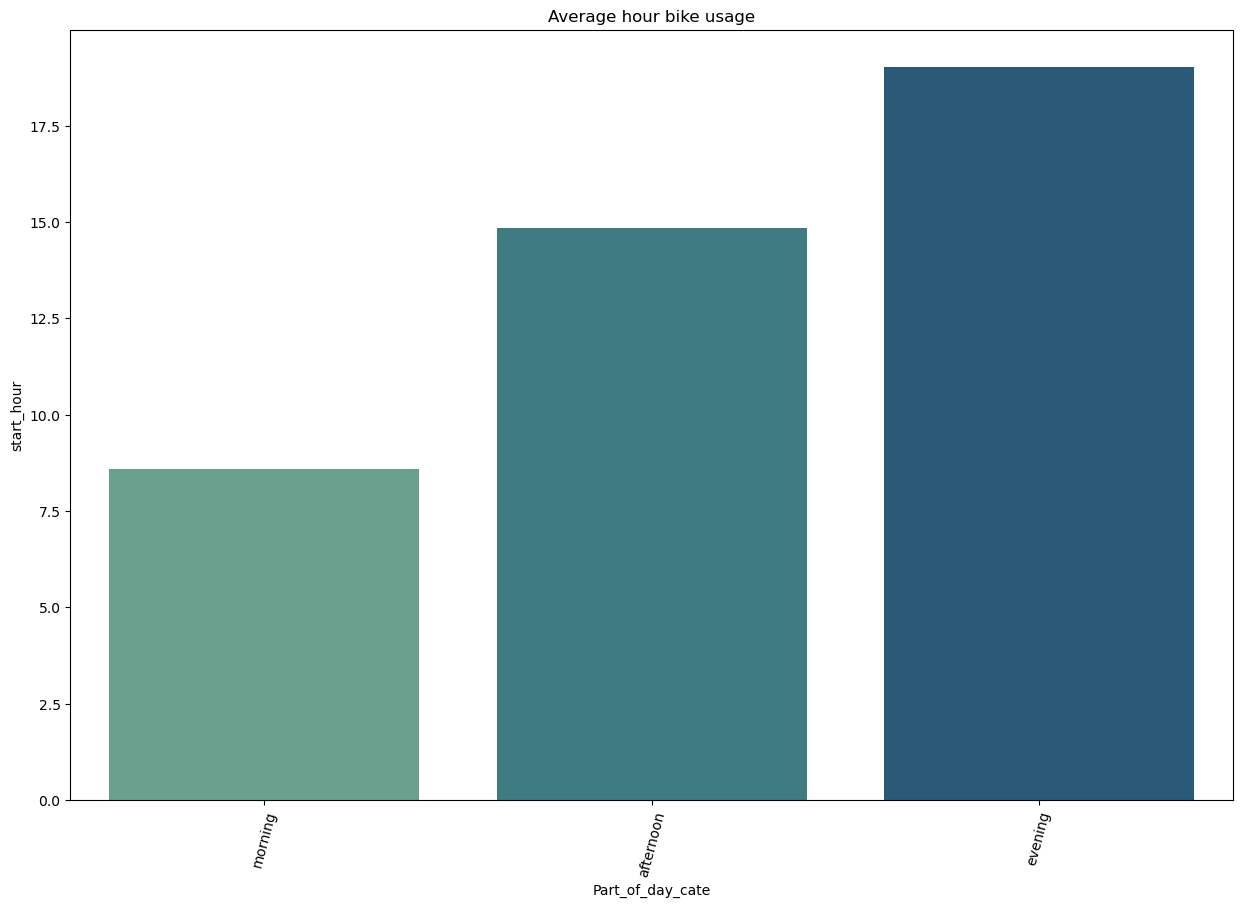

In [34]:
# 1. set figure size
fig = plt.figure(figsize=(15,10) )

# 2. group by 
citi = citidf.groupby('Part_of_day_cate')['start_hour'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='Part_of_day_cate', y = 'start_hour', data = citi,
                 palette = 'crest')
plt.title("Average hour bike usage")
plt.xticks(rotation = 75)

### The chart above lets us know that the average morning bike ride is 8am, average afternoon citi bike ride is 15 (or 3pm), and average evening citi bike ride is 18 (or 6pm). 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thu'),
  Text(1, 0, 'Fri'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Sat'),
  Text(5, 0, 'Mon'),
  Text(6, 0, 'Sun')])

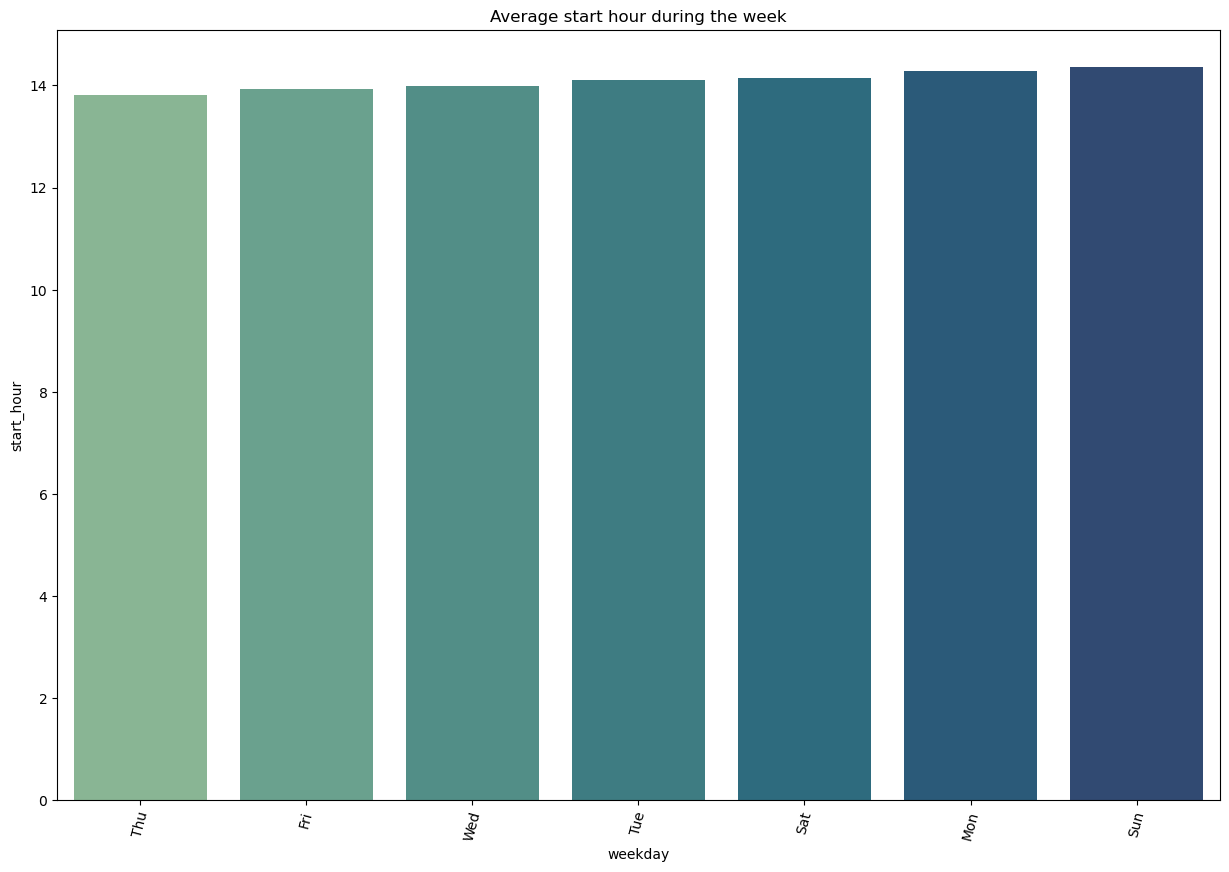

In [35]:
# 1. set figure size
fig = plt.figure(figsize=(15,10) )

# 2. group by 
citi = citidf.groupby('weekday')['start_hour'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='weekday', y = 'start_hour', data = citi,
                 palette = 'crest')
plt.title("Average start hour during the week")
plt.xticks(rotation = 75)

### The chart above tells us that the average start hour during the week is 14 or (2pm) 

# 7 Insights gained from analysis

### -The busiest day of the week is Monday with more bikes being used
### -The least busiest day of the week is Saturday with the least amount of bikes used
### -The busiest time of day seems to be 17 hour (or 5pm), Second busiest time is 18 hour (or 6pm), Third busiest time is 8 (or 8 am).
### -Males tend to use the citibikes more than women
### -The average start hour is 14 (or 2pm)

# 8 Hypothesis to test later

### 1. Mondays at 5pm is the busiest time for citibike rider usage
### 2. Saturdays 4am are the least busy time for citibike rider usage
### 3. Males usage of citibikes is much higher than females
### 4. People born in the 90's use citibikes the most